# CAPES DB

Overview da base

## Table of Contents
1. [Dadasets](#datasets)
  1. [Programas](#programas)
  1. [Docentes](#docentes)
  1. [Discentes](#discentes)
  1. [Produção Bibliográfica](#producao)
2. [Sample Queries](#sample-queries)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fastparquet import ParquetFile

In [2]:
## Definitions                                                                  
dataset_home = "../dataset"                                                      
datasrc_home = "../datasrc"

dataset_table = [                                                               
 ["docentes", "br-capes-docentes.parquet"],                                     
 ["discentes", "br-capes-discentes.parquet"],                                   
 ["programas", "br-capes-programas.parquet"]]                                   
ds_df = pd.DataFrame(dataset_table, columns='dataset filename'.split())

## Programas <a name="programas"></a>

### Overview

In [3]:
pq_filename = dataset_home + '/' + ds_df[ds_df['dataset'] == 'programas'].iloc[0]['filename']
print('Arquivo parquet: "{}"'.format(pq_filename))

Arquivo parquet: "../dataset/br-capes-programas.parquet"


In [4]:
ParquetFile(pq_filename).info

{'name': '../dataset/br-capes-programas.parquet',
 'columns': ['CD_PROGRAMA_IES',
  'AN_BASE',
  'NM_GRANDE_AREA_CONHECIMENTO',
  'NM_AREA_CONHECIMENTO',
  'NM_SUBAREA_CONHECIMENTO',
  'NM_ESPECIALIDADE',
  'CD_AREA_AVALIACAO',
  'NM_AREA_AVALIACAO',
  'SG_ENTIDADE_ENSINO',
  'NM_ENTIDADE_ENSINO',
  'CS_STATUS_JURIDICO',
  'DS_DEPENDENCIA_ADMINISTRATIVA',
  'DS_ORGANIZACAO_ACADEMICA',
  'NM_REGIAO',
  'NM_MUNICIPIO_PROGRAMA_IES',
  'SG_UF_PROGRAMA',
  'NM_GRAU_PROGRAMA',
  'CD_CONCEITO_PROGRAMA',
  'ANO_INICIO_PROGRAMA',
  'AN_INICIO_CURSO',
  'IN_REDE',
  'SG_ENTIDADE_ENSINO_REDE',
  'DS_SITUACAO_PROGRAMA',
  'DT_SITUACAO_PROGRAMA',
  'ID_ADD_FOTO_PROGRAMA_IES',
  'ID_ADD_FOTO_PROGRAMA',
  'NM_PROGRAMA_IDIOMA'],
 'partitions': [],
 'rows': 19810}

### Totais

In [5]:
pf = ParquetFile(pq_filename)
df = pf.to_pandas(['AN_BASE', 'CD_PROGRAMA_IES'])
#df2 = pf.to_pandas(['col1', 'col2'], categories=['col1'])

In [6]:
print('{} programas de pós graduação identificados entre os anos: {} e {}'.format(\
            df['CD_PROGRAMA_IES'].nunique(),
            df['AN_BASE'].min(),
            df['AN_BASE'].max()))

4431 programas de pós graduação identificados entre os anos: 2013 e 2017


Text(0.5,1,'Número de cursos de pós graduação no Brasil')

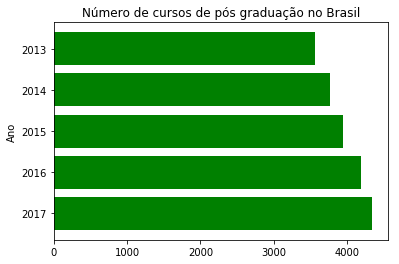

In [7]:
fig, ax = plt.subplots()
years = df['AN_BASE'].unique()
y_pos = np.arange(len(years))
n_programs = df[['AN_BASE', 'CD_PROGRAMA_IES']].groupby('AN_BASE').count()['CD_PROGRAMA_IES'].tolist()

ax.barh(y_pos, n_programs, align='center', color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(years)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_ylabel('Ano')
ax.set_title('Número de cursos de pós graduação no Brasil')

## Docentes <a name="docentes"></a>

## Discentes <a name="discentes"></a>

## Produção Bibliográfica <a name="producao"></a>

# Sample Queries <a name="sample-queries"> </a>